In [209]:
import pandas as pd
import numpy as np
import plotly
# import vincent
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
import json

with open('transactions_final.json') as json_file:
    data = json.load(json_file)
    data = data['transactions']
    result = pd.DataFrame.from_dict(data).T
    result.index = result.index.astype(str)
    result['amount'] = result['amount'].astype(int)
    result['passport'] = result['passport'].astype(str)
    result['date'] = pd.to_datetime(result['date'], format='%Y-%m-%dT%H:%M:%S')
    result['account_valid_to'] = pd.to_datetime(result['account_valid_to'], format='%Y-%m-%d')
    result['date_of_birth'] = pd.to_datetime(result['date_of_birth'], format='%Y-%m-%d')
    result['passport_valid_to'] = pd.to_datetime(result['passport_valid_to'], format='%Y-%m-%d')
    data = result

In [211]:
d = {'Отказ': False, 'Успешно': True}
data['oper_result'] = data['oper_result'].map(d)
data.head()
data.head()

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address
3649235840,2020-05-04 00:00:04,50785425162189603667,7456771640,2026-03-06,6-33721,Кадимов,Корнелиус,Ковалько,1993-09-17,2300733597,2027-12-11,+74304126656,Оплата,6734,True,POS43792,POS,Нижний Новгород,"Нижний Новгород, ул. Короленковская, д. 5"
3649235841,2020-05-04 00:01:19,57642678631657633216,7456771641,2025-08-15,6-33721,Кадимов,Корнелиус,Ковалько,1993-09-17,2300733597,2021-10-19,+74304126656,Снятие,69108,False,POS43792,POS,Заречный,"Заречный, ул. Селянская, д. 57"
3649235842,2020-05-04 00:02:51,50606101490380719590,7456771642,2034-09-08,2-10067,Котков,Валерьян,Байбаков,1946-09-08,3153290165,2006-07-07,+74832003245,Снятие,52699,True,POS43792,POS,Донецк,"Донецк, ул. Возрождения, д. 23"
3649235843,2020-05-04 00:04:16,40801177229019601602,7456771643,2033-12-14,7-17459,Сафьянов,Кондрат,Романцов,1965-11-27,3307023178,2031-11-17,+75914405368,Оплата,9705,True,POS28311,POS,Красноуфимск,"Красноуфимск, ул. Старошишковская, д. 77"
3649235844,2020-05-04 00:05:56,57447203234952512132,7456771644,2025-06-20,2-68359,Карельский,Алишер,Шавкунин,1984-09-12,6750185314,2030-01-09,+74862414292,Пополнение,82576,False,POS75616,POS,Черкесск,"Черкесск, ул. Гинтовта, д. 56"


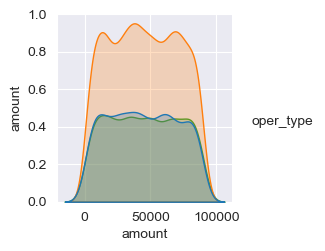

In [212]:
sns.pairplot(data[['amount','terminal_type','oper_type']],
             hue= 'oper_type')
plt.show()

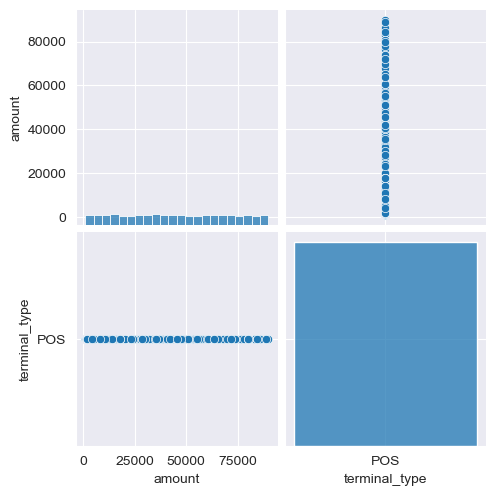

In [213]:
g = sns.pairplot(data, vars=['amount', 'terminal_type'])
plt.show()

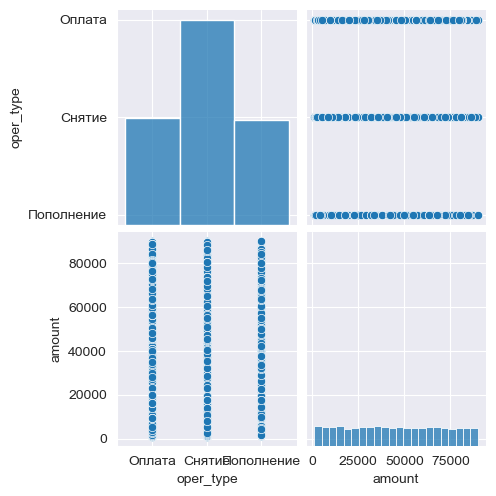

In [214]:
g = sns.pairplot(data, vars=[ 'oper_type', 'amount'])
plt.show()

In [215]:
gr = data.merge(data.groupby(['account'])['amount'].mean(), how='left', on='account')

In [216]:
gr[(gr['phone'] == '+71750428911')]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount_x,oper_result,terminal,terminal_type,city,address,amount_y


In [217]:
gr.head(1000)

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount_x,oper_result,terminal,terminal_type,city,address,amount_y
0,2020-05-04 00:00:04,50785425162189603667,7456771640,2026-03-06,6-33721,Кадимов,Корнелиус,Ковалько,1993-09-17,2300733597,2027-12-11,+74304126656,Оплата,6734,True,POS43792,POS,Нижний Новгород,"Нижний Новгород, ул. Короленковская, д. 5",6734.0
1,2020-05-04 00:01:19,57642678631657633216,7456771641,2025-08-15,6-33721,Кадимов,Корнелиус,Ковалько,1993-09-17,2300733597,2021-10-19,+74304126656,Снятие,69108,False,POS43792,POS,Заречный,"Заречный, ул. Селянская, д. 57",69108.0
2,2020-05-04 00:02:51,50606101490380719590,7456771642,2034-09-08,2-10067,Котков,Валерьян,Байбаков,1946-09-08,3153290165,2006-07-07,+74832003245,Снятие,52699,True,POS43792,POS,Донецк,"Донецк, ул. Возрождения, д. 23",52699.0
3,2020-05-04 00:04:16,40801177229019601602,7456771643,2033-12-14,7-17459,Сафьянов,Кондрат,Романцов,1965-11-27,3307023178,2031-11-17,+75914405368,Оплата,9705,True,POS28311,POS,Красноуфимск,"Красноуфимск, ул. Старошишковская, д. 77",9705.0
4,2020-05-04 00:05:56,57447203234952512132,7456771644,2025-06-20,2-68359,Карельский,Алишер,Шавкунин,1984-09-12,6750185314,2030-01-09,+74862414292,Пополнение,82576,False,POS75616,POS,Черкесск,"Черкесск, ул. Гинтовта, д. 56",82576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-05-04 22:52:34,40077730053302515746,7456772635,2022-05-11,2-46474,Акименко,Всеслав,Понофидин,1964-04-23,9725198450,2027-05-01,+78892506437,Снятие,2616,True,POS43792,POS,Полярный,"Полярный, ул. Седовцов, д. 93",2616.0
996,2020-05-04 22:53:41,49575709069134729165,7456772636,2024-09-07,2-46474,Акименко,Всеслав,Понофидин,1964-04-23,9725198450,2024-06-23,+78892506437,Снятие,47797,False,POS43792,POS,Полярный,"Полярный, ул. Седовцов, д. 93",47797.0
997,2020-05-04 22:55:08,53352972510893055565,7456772637,2023-12-03,2-46474,Акименко,Всеслав,Понофидин,1964-04-23,9725198450,2021-05-23,+78892506437,Снятие,46317,False,POS43792,POS,Полярный,"Полярный, ул. Седовцов, д. 93",46317.0
998,2020-05-04 22:56:46,53311450830496537400,7456772638,2035-02-09,2-46474,Акименко,Всеслав,Понофидин,1964-04-23,9725198450,2032-01-28,+78892506437,Снятие,14076,False,POS43792,POS,Полярный,"Полярный, ул. Седовцов, д. 93",14076.0


In [218]:
import re
match = re.fullmatch(r'\+79\d{9}', '+79653366322')
print('YES' if match else 'NO')

YES


In [219]:
gr['phone'].str.findall(r'\[?\+79\d{9}\]?', flags=re.IGNORECASE)

0        []
1        []
2        []
3        []
4        []
         ..
10228    []
10229    []
10230    []
10231    []
10232    []
Name: phone, Length: 10233, dtype: object

In [251]:
data[(data['phone'].str.match(r'\[?\+7\d{10}\]?') == False)]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address


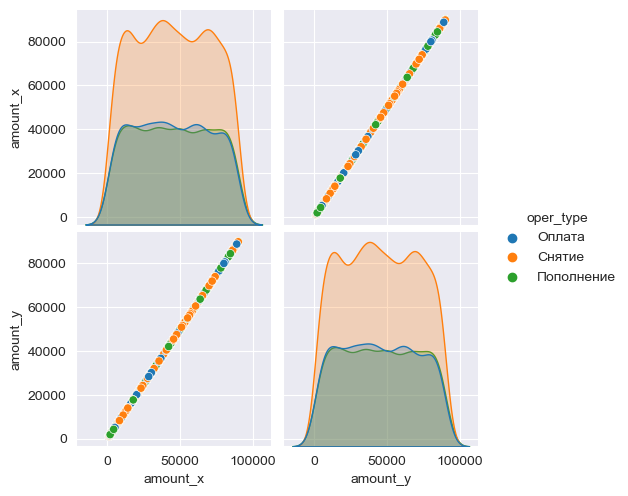

In [221]:
sns.pairplot(gr[['amount_x','amount_y','oper_type']],
             hue= 'oper_type')
plt.show()

In [ ]:
day_operations = data[(data['date'].dt.hour >= 6) & (data['date'].dt.hour <= 22)]
day_operations.describe()

In [ ]:
night_operations = data[(data['date'].dt.hour < 6) | (data['date'].dt.hour > 22)]
night_operations.describe()

In [ ]:
day_operations.oper_result.value_counts()

In [ ]:
night_operations.oper_result.value_counts()

In [236]:
datetime.date.today()

datetime.date(2022, 10, 17)

In [237]:
data.loc[:,'date_of_birth'].dt.date

3649235840    1993-09-17
3649235841    1993-09-17
3649235842    1946-09-08
3649235843    1965-11-27
3649235844    1984-09-12
                 ...    
3649246068    1986-07-12
3649246069    1941-02-06
3649246070    1932-04-12
3649246071    1968-06-01
3649246072    1968-06-01
Name: date_of_birth, Length: 10233, dtype: object

In [238]:
data.loc[data['date_of_birth'] > pd.to_datetime(str(datetime.date.today()))]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address


In [239]:
str(datetime.date.today())

'2022-10-17'

In [240]:
pd.to_datetime(str(datetime.date.today()))

Timestamp('2022-10-17 00:00:00')

In [241]:
data.head(100)

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address
3649235840,2020-05-04 00:00:04,50785425162189603667,7456771640,2026-03-06,6-33721,Кадимов,Корнелиус,Ковалько,1993-09-17,2300733597,2027-12-11,+74304126656,Оплата,6734,True,POS43792,POS,Нижний Новгород,"Нижний Новгород, ул. Короленковская, д. 5"
3649235841,2020-05-04 00:01:19,57642678631657633216,7456771641,2025-08-15,6-33721,Кадимов,Корнелиус,Ковалько,1993-09-17,2300733597,2021-10-19,+74304126656,Снятие,69108,False,POS43792,POS,Заречный,"Заречный, ул. Селянская, д. 57"
3649235842,2020-05-04 00:02:51,50606101490380719590,7456771642,2034-09-08,2-10067,Котков,Валерьян,Байбаков,1946-09-08,3153290165,2006-07-07,+74832003245,Снятие,52699,True,POS43792,POS,Донецк,"Донецк, ул. Возрождения, д. 23"
3649235843,2020-05-04 00:04:16,40801177229019601602,7456771643,2033-12-14,7-17459,Сафьянов,Кондрат,Романцов,1965-11-27,3307023178,2031-11-17,+75914405368,Оплата,9705,True,POS28311,POS,Красноуфимск,"Красноуфимск, ул. Старошишковская, д. 77"
3649235844,2020-05-04 00:05:56,57447203234952512132,7456771644,2025-06-20,2-68359,Карельский,Алишер,Шавкунин,1984-09-12,6750185314,2030-01-09,+74862414292,Пополнение,82576,False,POS75616,POS,Черкесск,"Черкесск, ул. Гинтовта, д. 56"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649235935,2020-05-04 02:11:30,58143734797973278673,7456771735,2027-07-20,2-62357,Жандр,Геронтий,Папкович,1972-07-12,2099018425,2022-04-07,+76077614851,Оплата,19975,True,POS28311,POS,Красноармейск,"Красноармейск, ул. Нечуя-Левицкого, д. 9"
3649235936,2020-05-04 02:12:59,57060585078522382396,7456771736,2021-10-28,2-62357,Жандр,Геронтий,Папкович,1972-07-12,2099018425,2026-09-10,+76077614851,Пополнение,22779,False,POS28311,POS,Красноармейск,"Красноармейск, ул. Нечуя-Левицкого, д. 9"
3649235937,2020-05-04 02:14:39,45757866887475526748,7456771737,2023-02-04,2-62357,Жандр,Геронтий,Папкович,1972-07-12,2099018425,2034-05-04,+76077614851,Пополнение,21252,False,POS28311,POS,Красноармейск,"Красноармейск, ул. Нечуя-Левицкого, д. 9"
3649235938,2020-05-04 02:16:10,42291921686743684339,7456771738,2024-01-18,2-62357,Жандр,Геронтий,Папкович,1972-07-12,2099018425,2024-12-02,+76077614851,Пополнение,2906,False,POS28311,POS,Красноармейск,"Красноармейск, ул. Нечуя-Левицкого, д. 9"


In [242]:
data[(data['passport'].str.match(r'\d{10}') == False)][['passport', 'oper_result']]

,passport,oper_result


In [243]:
data[(data['oper_result'] == False)]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address
3649235841,2020-05-04 00:01:19,57642678631657633216,7456771641,2025-08-15,6-33721,Кадимов,Корнелиус,Ковалько,1993-09-17,2300733597,2021-10-19,+74304126656,Снятие,69108,False,POS43792,POS,Заречный,"Заречный, ул. Селянская, д. 57"
3649235844,2020-05-04 00:05:56,57447203234952512132,7456771644,2025-06-20,2-68359,Карельский,Алишер,Шавкунин,1984-09-12,6750185314,2030-01-09,+74862414292,Пополнение,82576,False,POS75616,POS,Черкесск,"Черкесск, ул. Гинтовта, д. 56"
3649235846,2020-05-04 00:08:38,54512637707858487085,7456771646,2026-12-06,2-68359,Карельский,Алишер,Шавкунин,1984-09-12,6750185314,2022-03-06,+74862414292,Снятие,26297,False,POS75616,POS,Черкесск,"Черкесск, ул. Гинтовта, д. 56"
3649235847,2020-05-04 00:10:09,42547816614271565573,7456771647,2029-07-05,2-68359,Карельский,Алишер,Шавкунин,1984-09-12,6750185314,2021-12-02,+74862414292,Оплата,9959,False,POS75616,POS,Черкесск,"Черкесск, ул. Гинтовта, д. 56"
3649235848,2020-05-04 00:11:38,51529500095620747066,7456771648,2035-01-08,2-68359,Карельский,Алишер,Шавкунин,1984-09-12,6750185314,2028-11-02,+74862414292,Пополнение,49795,False,POS75616,POS,Черкесск,"Черкесск, ул. Гинтовта, д. 56"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649246065,2020-05-13 17:52:07,43912912848754323064,7456781865,2030-11-03,1-52990,Ходкевич,Джихангир,Сережников,1986-07-12,5338669072,2023-12-09,+70425393833,Снятие,47516,False,POS43792,POS,Камбарка,"Камбарка, ул. Тикоцкого, д. 49"
3649246066,2020-05-13 17:53:29,53802695101250208592,7456781866,2024-09-04,1-52990,Ходкевич,Джихангир,Сережников,1986-07-12,5338669072,2029-02-06,+70425393833,Снятие,8274,False,POS43792,POS,Камбарка,"Камбарка, ул. Тикоцкого, д. 49"
3649246067,2020-05-13 17:55:01,54623940745255316366,7456781867,2023-04-03,1-52990,Ходкевич,Джихангир,Сережников,1986-07-12,5338669072,2032-05-31,+70425393833,Снятие,55110,False,POS43792,POS,Камбарка,"Камбарка, ул. Тикоцкого, д. 49"
3649246068,2020-05-13 17:56:34,51455507818735472585,7456781868,2032-08-15,1-52990,Ходкевич,Джихангир,Сережников,1986-07-12,5338669072,2021-10-17,+70425393833,Снятие,45461,False,POS43792,POS,Камбарка,"Камбарка, ул. Тикоцкого, д. 49"


In [244]:
data.loc[data['passport_valid_to'] < data['date']].oper_result.value_counts()

True     338
False    308
Name: oper_result, dtype: int64

In [245]:
data.loc[data['oper_type'] == 'Снятие'].oper_result.value_counts()

False    3330
True     1707
Name: oper_result, dtype: int64

In [246]:
data.loc[data['oper_type'] == 'Пополнение'].oper_result.value_counts()

True     1298
False    1279
Name: oper_result, dtype: int64

In [252]:
data.oper_type.value_counts()

Снятие        5037
Оплата        2619
Пополнение    2577
Name: oper_type, dtype: int64

In [253]:
data.oper_result.value_counts()

False    5865
True     4368
Name: oper_result, dtype: int64